In [3]:
import pandas as pd

# Load the dataset
file_path = 'books_1.Best_Books_Ever.csv'
books_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
books_df.head()


,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [4]:
# Filtering the dataset for books in foreign languages (English)
foreign_language_books_df = books_df[books_df['language'] == 'English']

In [5]:
import re
# Function to check if the description suggests the book is suitable for children
def is_description_suitable(description):
    if not isinstance(description, str):
        return False  # If the description is missing or not a string, we'll consider it unsuitable

    # List of keywords that might indicate unsuitability for young children
    unsuitable_keywords = ['Mature', 'Violence', 'Sexual', 'Explicit', 'Horror']

    # Basic check for the presence of these keywords
    if any(re.search(keyword, description, re.IGNORECASE) for keyword in unsuitable_keywords):
        return False
    return True

# Apply the updated function to further filter books
suitable_children_books_df = foreign_language_books_df[foreign_language_books_df['description'].apply(is_description_suitable)]

# Display filtered dataset
# suitable_children_books_df


In [6]:
# Filter books based on a high rating(>=4.0) and enough people commented(>=200000) and  a high enough positive rating(>=95.0)
highly_rated_children_books_df = suitable_children_books_df[(suitable_children_books_df['rating'] >= 4.0) & (suitable_children_books_df['numRatings'] >= 200000) &(suitable_children_books_df['likedPercent'] >= 95.0)]
# Display the dataset with highly selected books
# highly_rated_children_books_df


In [7]:
# Considering books with a known price and below a certain threshold (e.g. $20)
# Convert the 'price' column to numeric values
# This step will handle any non-numeric values by converting them to NaN
highly_rated_children_books_df['price'] = pd.to_numeric(highly_rated_children_books_df['price'], errors='coerce')

# Run this filter with the corrected price column
affordable_books = highly_rated_children_books_df[(highly_rated_children_books_df['price'] <= 20)]

# Display the final selection of books
affordable_books
# affordable_books(164 rows × 25 columns)

C:\Users\LYY\AppData\Local\Temp\ipykernel_17844\3079462786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highly_rated_children_books_df['price'] = pd.to_numeric(highly_rated_children_books_df['price'], errors='coerce')


,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
5,19063.The_Book_Thief,The Book Thief,NaN,Markus Zusak (Goodreads Author),4.37,Librarian's note: An alternate cover edition c...,English,9780375831003,"['Historical Fiction', 'Fiction', 'Young Adult...","['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",...,09/01/05,['National Jewish Book Award for Children’s an...,1834276,"['1048230', '524674', '186297', '48864', '26211']",96.0,"['Molching (Germany)', 'Germany']",https://i.gr-assets.com/images/S/compressed.ph...,1372809,14168,3.80
15,929.Memoirs_of_a_Geisha,Memoirs of a Geisha,NaN,Arthur Golden,4.12,"A literary sensation and runaway bestseller, t...",English,9781400096893,"['Fiction', 'Historical Fiction', 'Romance', '...","['Sayuri Nitta', 'Mr. Bekku', 'Ichiro Tanaka',...",...,09/23/97,[],1717312,"['712950', '615702', '295184', '66518', '26958']",95.0,"['Kyoto (Japan)', 'Japan']",https://i.gr-assets.com/images/S/compressed.ph...,862748,8993,2.76
31,8127.Anne_of_Green_Gables,Anne of Green Gables,Anne of Green Gables #1,L.M. Montgomery,4.26,As soon as Anne Shirley arrives at the snug wh...,English,9780451528827,"['Classics', 'Fiction', 'Young Adult', 'Childr...","['Marilla Cuthbert', 'Matthew Cuthbert', 'Dian...",...,10/28/08,[],727685,"['379818', '208919', '100304', '25501', '13143']",95.0,"['Avonlea, Prince Edward Island (Canada)', 'Pr...",https://i.gr-assets.com/images/S/compressed.ph...,695453,7340,6.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3556,18214414-the-silkworm,The Silkworm,Cormoran Strike #2,Robert Galbraith,4.04,Private investigator Cormoran Strike returns i...,English,9780316206877,"['Mystery', 'Fiction', 'Crime', 'Thriller', 'A...","['Cormoran Strike', 'Robin Ellacott', 'Matthew...",...,06/19/14,"['Audie Award for Mystery (2015)', 'Specsavers...",216932,"['68905', '99282', '39938', '6604', '2203']",96.0,"['London, England']",https://i.gr-assets.com/images/S/compressed.ph...,917,11,3.25
3954,35297426-then-she-was-gone,Then She Was Gone,NaN,Lisa Jewell (Goodreads Author),4.03,"THENShe was fifteen, her mother's golden girl....",English,9781501154645,"['Mystery', 'Thriller', 'Fiction', 'Mystery Th...","['Laurel Mack', 'Ellie Mack', 'Paul Mack', 'Ha...",...,NaN,['Goodreads Choice Award Nominee for Mystery &...,208605,"['66094', '93840', '39535', '6742', '2394']",96.0,[],https://i.gr-assets.com/images/S/compressed.ph...,796,9,5.97
5952,25893693-lilac-girls,Lilac Girls,Lilac Girls #1,Martha Hall Kelly (Goodreads Author),4.28,Inspired by the life of a real World War II he...,English,9781101883075,"['Historical Fiction', 'Fiction', 'World War I...","['Caroline Ferriday', 'Kasia Kuzmerick', 'Hert...",...,NaN,['Goodreads Choice Award Nominee for Historica...,213160,"['100414', '81

In [8]:
# At this step I need to see the complete list, so I need to print it out
affordable_books.to_csv('affordable_books_selection.csv', index=False)

In [9]:
import pandas as pd
# Here I made a file myself and manually entered the Lexile value of each book
# Considering that this is a dataset from the United States, I think it is reasonable to further screen the books according to the American Lexile criteria.
# But I didn't find any relevant data sets online, so I manually entered the book names filtered out in the previous step on the Lexile website, and finally made a table(Lexile_score.csv).
file_path_2 = 'Lexile_score.csv'
Lexile_df = pd.read_csv(file_path_2)

# Merge the two tables using the common 'title' column
merge_df = pd.merge(affordable_books, Lexile_df, on='title', how='left')

# Because it is a manual search, some books do not have corresponding Lexile values (NaN).
cleaned_merged_books_df = merge_df.dropna(subset=['Lexile'])

cleaned_merged_books_df.to_csv('cleaned_merged_books.csv', index=False)

C:\Users\LYY\AppData\Local\Temp\ipykernel_17844\1504663520.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='numRatings', y='title', data= top10_rated_books, palette="viridis")


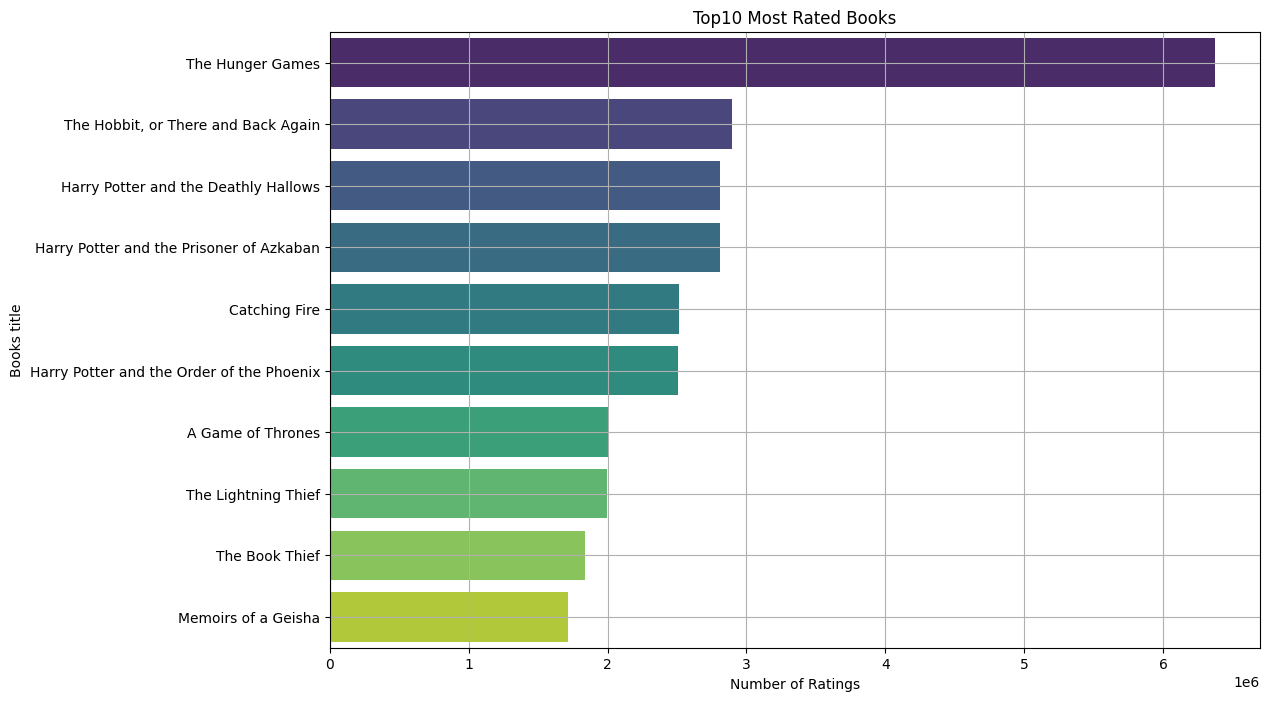

In [11]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Visualization 1 Top10 Most rated books
top10_rated_books = cleaned_merged_books_df.nlargest(10, 'numRatings')
plt.figure(figsize =(12,8))
sns.barplot(x='numRatings', y='title', data= top10_rated_books, palette="viridis")
plt.title('Top10 Most Rated Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Books title')
plt.grid(True)
plt.show()

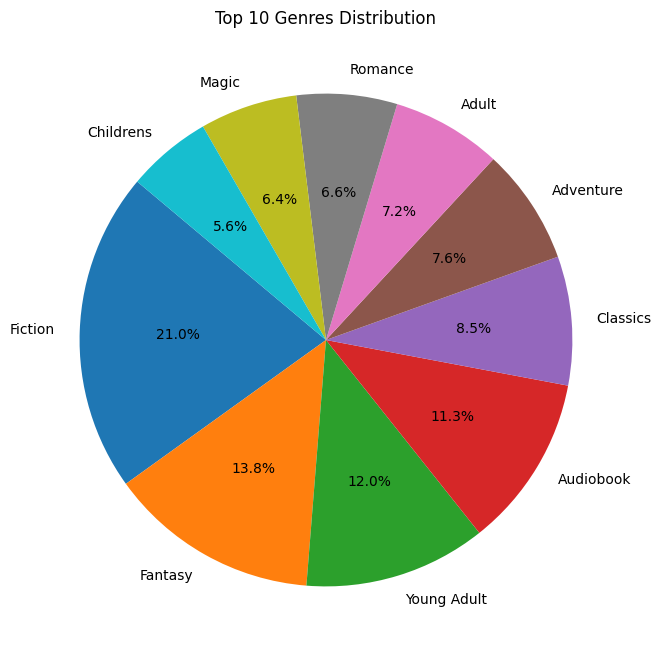

In [ ]:
# Visualization 2 Top10 Genres distribution
import ast
from collections import Counter
genre_list = []
for genres in cleaned_merged_books_df['genres']:
  genres = ast.literal_eval(genres)
  genre_list.extend(genres)
genre_counts = Counter(genre_list)
top_genres = dict(genre_counts.most_common(10))
plt.figure(figsize=(10, 8))
plt.pie(top_genres.values(), labels=top_genres.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Genres Distribution')
plt.show()

<ipython-input-47-cf5f31e33925>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_ratings.values, y=average_ratings.index, palette="mako")


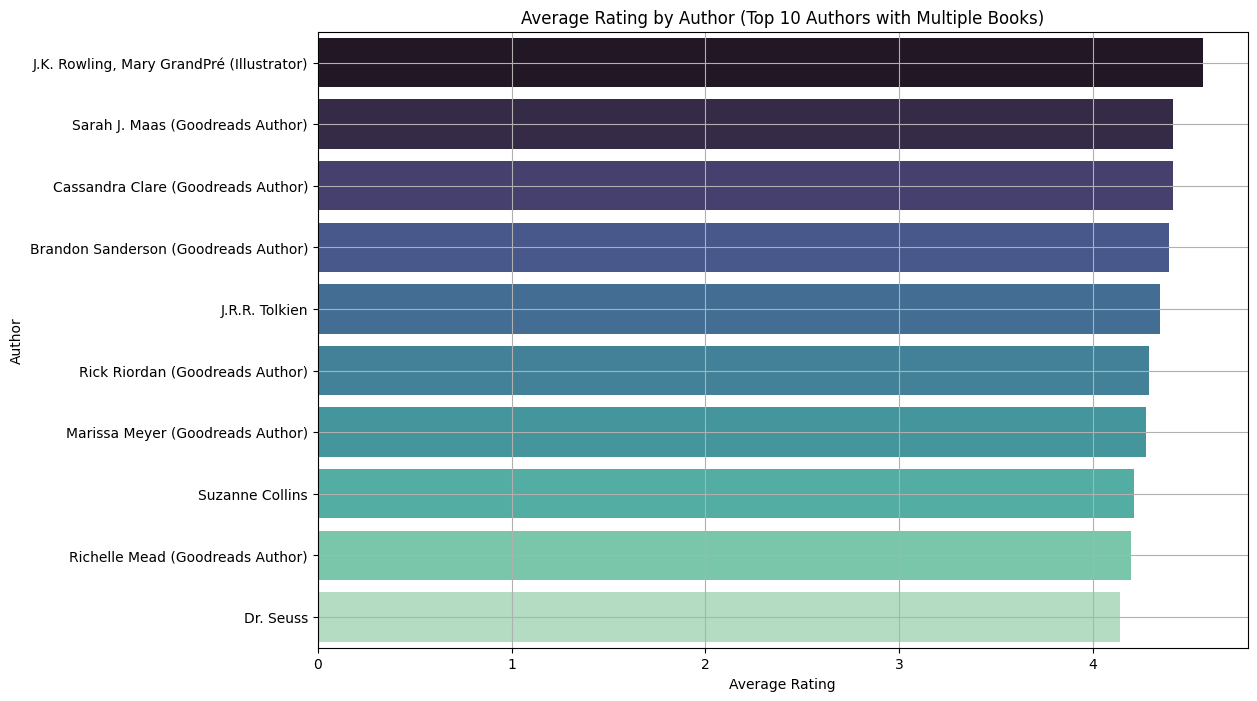

In [ ]:
# Visualization 3 Average ratings by Top10 Authors
author_counts = cleaned_merged_books_df['author'].value_counts()
authors_with_multiple_books = author_counts[author_counts > 1].index
filtered_books = books_df[books_df['author'].isin(authors_with_multiple_books)]
average_ratings = filtered_books.groupby('author')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=average_ratings.values, y=average_ratings.index, palette="mako")
plt.title('Average Rating by Author (Top 10 Authors with Multiple Books)')
plt.xlabel('Average Rating')
plt.ylabel('Author')
plt.grid(True)
plt.show()

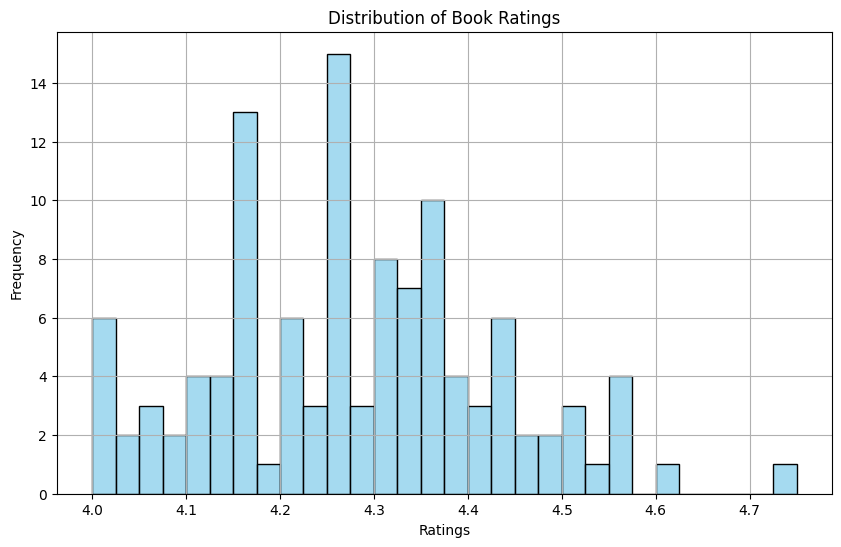

In [ ]:
# Visualization 4 Distribution of Book Ratings
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_merged_books_df['rating'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Book Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<ipython-input-49-35c230a0d04f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_merged_books_df['price'] = pd.to_numeric(cleaned_merged_books_df['price'], errors='coerce')


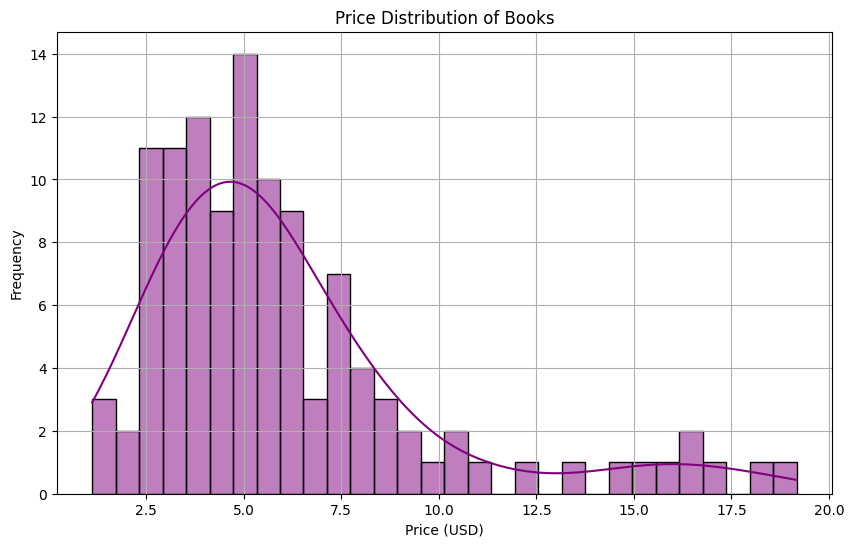

In [ ]:
# Visualization 5 Distribution of Books' price
cleaned_merged_books_df['price'] = pd.to_numeric(cleaned_merged_books_df['price'], errors='coerce')
books_with_price = cleaned_merged_books_df.dropna(subset=['price'])
plt.figure(figsize=(10, 6))
sns.histplot(books_with_price['price'], bins=30, color='purple', kde=True)
plt.title('Price Distribution of Books')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

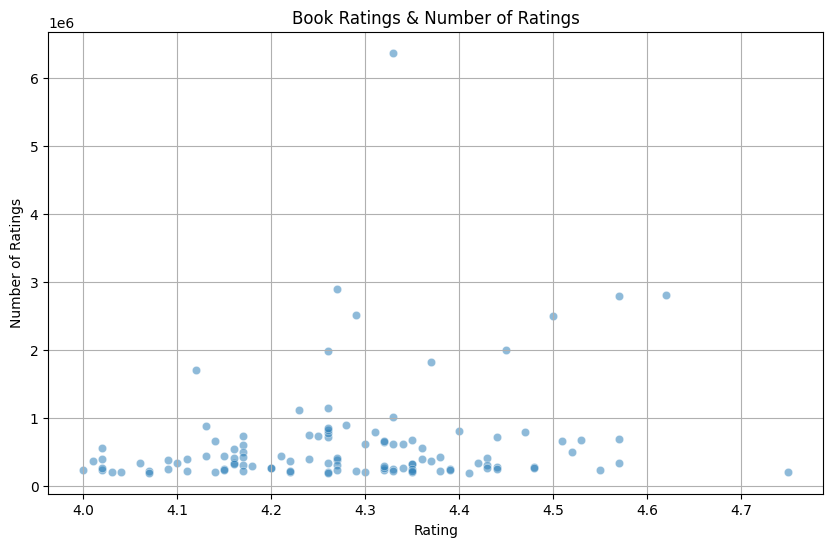

In [ ]:
# Visualization 6: Book Ratings & Number of Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_merged_books_df, x='rating', y='numRatings', alpha=0.5)
plt.title('Book Ratings & Number of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.grid(True)
plt.show()